In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('predict.csv')


In [43]:
data

,recency,topic_rank,diversity,authors_mean_rank,authors_mean_hindex,authors_mean_gindex,authors_mean_sociality,authors_mean_pagerank,authors_mean_productivity,journal_pagerank,journal_rank,title_len,abstract_len,n_authors,c5,log_authors_mean_sociality
0,16,1.0,-0.425436,500.0,1.0,1.0,6.0,NaN,NaN,NaN,101.0,66,1653,7,1.0,1.945910
1,8,7.0,-0.571967,134.0,1.0,1.0,6.0,NaN,NaN,NaN,24.0,59,1527,7,32.0,1.945910
2,15,19.0,-0.859644,235.0,1.0,1.0,5.0,NaN,NaN,NaN,49.0,169,1554,6,5.0,1.791759
3,6,4.0,-1.054999,1124.0,1.0,1.0,10.0,NaN,NaN,NaN,185.0,130,2121,11,7.0,2.397895
4,14,2.0,-0.476697,346.0,1.0,1.0,2.0,NaN,NaN,NaN,72.0,100,432,3,7.0,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,25,6.0,-0.330948,528.0,0.0,0.0,6.0,NaN,NaN,NaN,140.0,62,645,7,0.0,1.945910
475,6,12.0,-1.493480,2145.0,0.0,0.0,1.0,NaN,NaN,NaN,416.0,45,714,2,0.0,0.693147
476,24,17.0,-1.466320,551.0,0.0,0.0,4.0,NaN,NaN,NaN,146.0,84,0,5,0.0,1.609438
477,24,6.0,-1.556737,551.0,0.0,0.0,0.0,NaN,NaN,NaN,146.0,56,0,1,0.0,0.000000


In [44]:
data.isnull().sum()

recency                         0
topic_rank                      0
diversity                       0
authors_mean_rank               6
authors_mean_hindex             6
authors_mean_gindex             6
authors_mean_sociality          6
authors_mean_pagerank         479
authors_mean_productivity     479
journal_pagerank              479
journal_rank                   39
title_len                       0
abstract_len                    0
n_authors                       0
c5                              0
log_authors_mean_sociality      6
dtype: int64

Видим, что в датасете у нас три пустых колонки, можно их удалить из датасета. Так же authors_mean_sociality и log_authors_mean_sociality являются зависимыми признаками, значит можно избавиться от одного из них

In [45]:
data = data.drop(columns=['journal_pagerank','authors_mean_productivity','authors_mean_pagerank','log_authors_mean_sociality'])

Выведем список всех строк с NaN значением у признака/признаков

In [46]:
data[data.isna().any(axis = 1)]



,recency,topic_rank,diversity,authors_mean_rank,authors_mean_hindex,authors_mean_gindex,authors_mean_sociality,journal_rank,title_len,abstract_len,n_authors,c5
8,5,3.0,-1.464084,1282.0,1.000,1.000,3.0000,NaN,44,1191,4,8.0
15,13,20.0,-0.178360,326.0,1.000,1.000,2.0000,NaN,169,1323,3,9.0
19,14,19.0,-0.647923,1015.0,1.000,1.000,0.0000,NaN,32,275,1,2.0
22,8,2.0,-1.390480,94.0,1.000,1.000,8.0000,NaN,107,1987,9,46.0
23,5,3.0,-1.224150,219.0,1.000,1.000,2.0000,NaN,101,1147,3,49.0
56,7,6.0,-1.367137,1174.0,1.000,1.000,2.0000,NaN,165,1722,3,5.0
81,6,14.0,-0.296585,1469.0,1.000,1.000,7.0000,NaN,108,2407,8,5.0
85,21,4.0,-0.120934,106.0,1.000,1.000,10.0000,NaN,91,1350,11,7.0
97,5,12.0,-0.974201,1935.0,1.000,1.000,5.0000,NaN,64,341,6,2.0
107,6,7.0,-0.066097,1628.0,1.000,1.000,3.0000,NaN,161,2409,4,3.0


Попробуем поработать с датасетом, где NaN значения заполнены нулями

In [47]:
data_zeros = data.fillna(0)

In [48]:
data_zeros.isnull().sum()

recency                   0
topic_rank                0
diversity                 0
authors_mean_rank         0
authors_mean_hindex       0
authors_mean_gindex       0
authors_mean_sociality    0
journal_rank              0
title_len                 0
abstract_len              0
n_authors                 0
c5                        0
dtype: int64

Так как все признаки лежат в разных диапазонах значений, не лишним будет нормализовать их

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()
X = data_zeros.drop(columns='c5')
y = data_zeros['c5']
X = scaler.fit_transform(X)

Разобьем наш датасет на обучающую и тестовую выборки

Чтобы зафиксировать разбиение и результат моделей, воспользуемся np.random.seed

In [51]:
np.random.seed(21)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Baselines (LinearRegression, RandomForestRegressor, GradientBoosting)

In [54]:
from sklearn.metrics import r2_score


## LinearRegression

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [57]:
r2_score(y_test,model.predict(X_test))

0.48039830719833254

## RandomForestRegressor

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [60]:
r2_score(y_test,model.predict(X_test))

0.48548502012254646

## GradientBoosting

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

In [62]:
model = GradientBoostingRegressor()
model.fit(X_train,y_train)

GradientBoostingRegressor()

In [63]:
r2_score(y_test,model.predict(X_test))

0.6668230077909751

Без настройки гиперпараметров из моделей лучше всего справился GradientBoostingRegressor, воспользуемся модулем sklearn GridSearchCV для нахождения лучших гиперпараметров для нашей модели

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
parameters = {'loss': ('ls', 'lad', 'huber', 'quantile'),
              'learning_rate': [0.1,0.07,0.05,0.04,0.03,0.02],
              'n_estimators':[500,600,700,900]}

In [66]:
clf = GridSearchCV(model,parameters,'r2')

C:\Users\vasya\anaconda3\envs\pythonProject\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass scoring=r2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [67]:
clf.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.07, 0.05, 0.04, 0.03, 0.02],
                         'loss': ('ls', 'lad', 'huber', 'quantile'),
                         'n_estimators': [500, 600, 700, 900]},
             scoring='r2')

In [68]:
clf.best_params_

{'learning_rate': 0.1, 'loss': 'lad', 'n_estimators': 900}

In [69]:
r2_score(y_test,clf.predict(X_test))

0.7700327598416694

Осталось посмотреть на важнейшие признаки для нашей модели

Text(0.5, 1.0, 'Feature Importance')

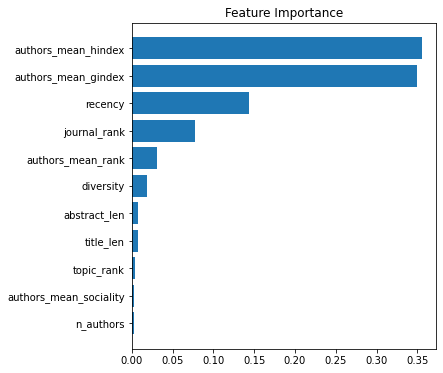

In [70]:
feature_importance = clf.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data.columns)[sorted_idx])
plt.title('Feature Importance')


Видно, что наиболее важными признаками для модели являются: authors_mean_hindex и authors_mean_gindex.
И это логически правильно, ведь h-index и g-index как раз служат метрикой продуктивности и цитируемости автора.



Мы работали с датасетом, где NaN значения были заполнены нулями, попробуем теперь использовать interpolate (метод, который использует интерполяцию для отсутствующих значений)

In [71]:
data_interpolated = data.interpolate('cubicspline')

In [72]:
data_interpolated.isnull().sum()

recency                   0
topic_rank                0
diversity                 0
authors_mean_rank         0
authors_mean_hindex       0
authors_mean_gindex       0
authors_mean_sociality    0
journal_rank              0
title_len                 0
abstract_len              0
n_authors                 0
c5                        0
dtype: int64

И повторим те же действия, что и предыдущим датасетом (нормализуем и разобьем на две выборки)


In [73]:
scaler = StandardScaler()
y = data_interpolated['c5']
X = data_interpolated.drop(columns='c5')
X = scaler.fit_transform(X)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [75]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.07, 0.05, 0.04, 0.03, 0.02],
                         'loss': ('ls', 'lad', 'huber', 'quantile'),
                         'n_estimators': [500, 600, 700, 900]},
             scoring='r2')

In [76]:
r2_score(y_test,clf.predict(X_test))


0.6938283777637873

К сожалению, качество модели улучшить не получилось.

